In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

In [2]:
# Conexión a BD
# ==============================================================================
import pyodbc

In [3]:
# Configuración de BD y conexión
# ==============================================================================
direccion_servidor = '192.168.1.32,55078'
nombre_bd = 'BDVirunet'
nombre_usuario = 'sa'
password = '123456'

try:
    conexion = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=' + 
                              direccion_servidor+';DATABASE='+nombre_bd+';UID='+nombre_usuario+';PWD=' + password)
    print("Conexión exitosa")
    
except Exception as e:
    print("Ocurrió un error al conectar a SQL Server: ", e)

Conexión exitosa


In [4]:
dFechaInicio = '2019-01-01'
dFechaFin = '2020-12-31'

In [11]:
try:
    with conexion.cursor() as cursor:
            consulta = "exec STP_OBTENER_TOTALIZADO_PLAGAS ?,?,?,?"
            cursor.execute(consulta, (dFechaInicio, dFechaFin, 1,0))

            rows = cursor.fetchall()
            
            cols = []
            
            for i,_ in enumerate(cursor.description):
                cols.append(cursor.description[i][0])

            pd.DataFrame(np.array(rows), columns = cols)
            
            df = pd.DataFrame(columns =['Evaluador','Fecha','Fundo','Filtrado','Turno','Lote','Grupo_Plaga',
                                        'Plaga','Caracteristica','Suma','Grado','Promedio','Porcentaje'] )
            for i in range(len(rows)):
                df.loc[i] = list(rows[i])
except Exception as e: 
    print(e)

In [12]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [14]:
arrPlagas = df["Plaga"].unique()
arrFiltrado = df["Filtrado"].unique()

In [17]:
from pathlib import Path

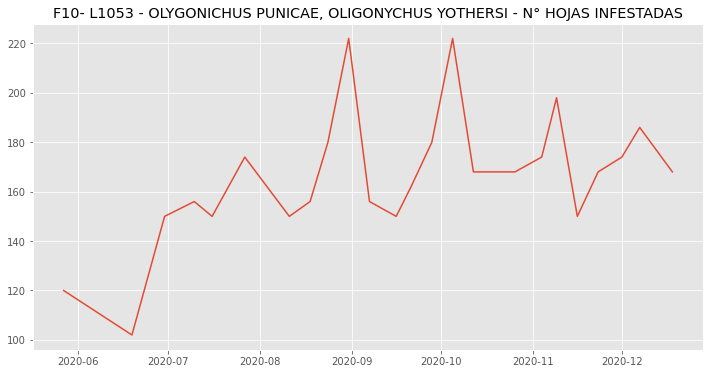

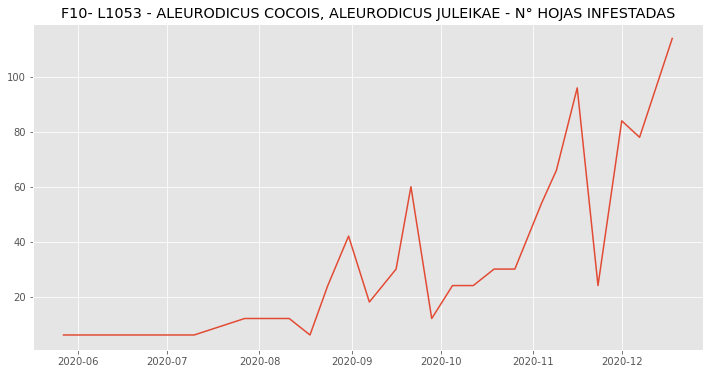

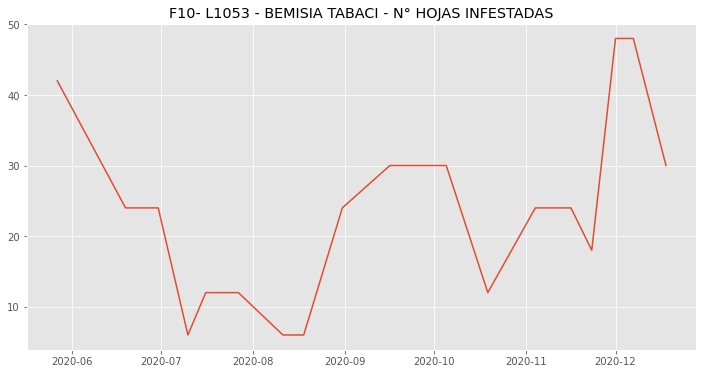

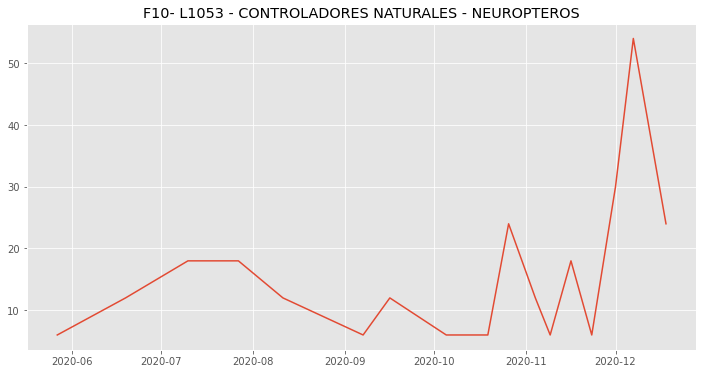

In [22]:
for filtrado in arrFiltrado:
    dfFiltrado = df[df["Filtrado"] == filtrado]
    arrLote = dfFiltrado["Lote"].unique()
    for lote  in arrLote:
            dfLote = dfFiltrado[dfFiltrado['Lote'] == lote]
            arrPlagaxLote = dfLote['Plaga'].unique()
            for plaga in arrPlagaxLote:
                dfPlaga = dfLote[dfLote['Plaga'] == plaga]
                arrPlagaxCarac = dfPlaga['Caracteristica'].unique()
                for caracteristica in arrPlagaxCarac:
                    dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica]
                    dfCarac = dfCarac.sort_values(by=['Fecha'])
                    
                    if lote == "1053" and dfCarac.shape[0] > 10:     

                        dfCarac = dfCarac[dfCarac["Suma"] > 0]         

                        x = dfCarac["Fecha"]
                        y = dfCarac["Suma"]
                        title = "F{}- L{} - {} - {}".format(filtrado,lote,plaga,caracteristica)
                        
                        pathCarac = Path('{}/{}'.format('img',plaga.replace('/','')))
                        pathCarac.mkdir(parents=True, exist_ok=True)  

                        fig = plt.figure(figsize=(12, 6))
                        plt.plot(x,y)
                        plt.title(title)
                        plt.savefig('{}/{}/{}.png'.format('img',plaga.replace('/',''),caracteristica.replace('/','')))
                        plt.show()